In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.style.use('bmh')


In [21]:
df = web.DataReader('TATAPOWER.NS', data_source='yahoo',start='2009-01-01', end='2021-05-10')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,76.593414,74.122971,76.236359,74.398003,4852981.0,58.238811
2009-01-05,80.776764,74.914284,74.914284,80.366631,11470801.0,62.911057
2009-01-06,81.157944,76.424538,81.157944,77.785210,4343964.0,60.890331
2009-01-07,79.227905,73.534309,78.166389,76.757462,4213241.0,60.085789
2009-01-09,77.008369,71.652527,76.236359,72.356987,7869445.0,56.641106
...,...,...,...,...,...,...
2021-05-04,103.400002,100.000000,100.599998,101.050003,55562146.0,101.050003
2021-05-05,102.949997,100.250000,102.400002,102.000000,25421812.0,102.000000
2021-05-06,104.650002,101.599998,102.550003,102.900002,35150275.0,102.900002


In [22]:
df.shape

(3035, 6)

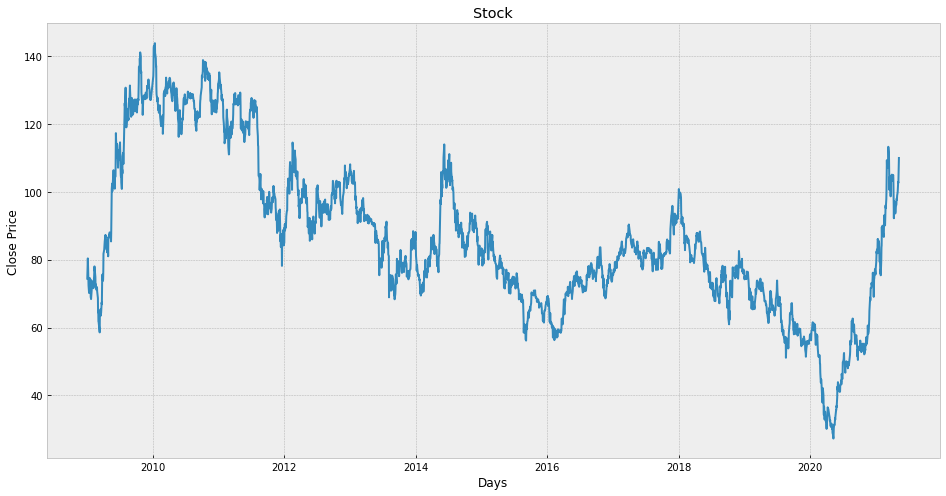

In [23]:
plt.figure(figsize=(16,8))
plt.title('Stock')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.show()

In [24]:
df = df[['Close']]
df.head()

,Close
Date,
2009-01-02,74.398003
2009-01-05,80.366631
2009-01-06,77.785210
2009-01-07,76.757462
2009-01-09,72.356987


In [25]:
future_days=25
df['Prediction'] = df [['Close']].shift(-future_days)
df.tail()

<ipython-input-25-f04c635c9f7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df [['Close']].shift(-future_days)


,Close,Prediction
Date,,
2021-05-04,101.050003,NaN
2021-05-05,102.000000,NaN
2021-05-06,102.900002,NaN
2021-05-07,102.699997,NaN
2021-05-10,109.949997,NaN


In [26]:
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 74.39800262]
 [ 80.36663055]
 [ 77.78520966]
 ...
 [103.44999695]
 [103.59999847]
 [103.25      ]]


In [27]:
Y = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(Y)

[[ 74.39800262]
 [ 80.36663055]
 [ 77.78520966]
 ...
 [103.44999695]
 [103.59999847]
 [103.25      ]]


In [28]:
X.shape
X.reshape(-1,1)
Y.shape
Y.reshape(-1,1)

array([[ 74.39800262],
       [ 80.36663055],
       [ 77.78520966],
       ...,
       [103.44999695],
       [103.59999847],
       [103.25      ]])

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,random_state=0)

In [34]:
lr = LinearRegression().fit(x_train,y_train)

1.0

In [41]:
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[ 92.05000305],
       [ 94.05000305],
       [ 96.        ],
       [ 95.15000153],
       [ 97.90000153],
       [100.34999847],
       [105.25      ],
       [109.30000305],
       [107.34999847],
       [109.05000305],
       [107.        ],
       [107.34999847],
       [113.25      ],
       [111.55000305],
       [109.69999695],
       [103.30000305],
       [100.55000305],
       [104.15000153],
       [104.75      ],
       [104.55000305],
       [101.25      ],
       [ 98.65000153],
       [103.44999695],
       [103.59999847],
       [103.25      ]])

In [46]:
lr_prediction = lr.predict(x_future)

print(lr_prediction)

[[ 92.05000305]
 [ 94.05000305]
 [ 96.        ]
 [ 95.15000153]
 [ 97.90000153]
 [100.34999847]
 [105.25      ]
 [109.30000305]
 [107.34999847]
 [109.05000305]
 [107.        ]
 [107.34999847]
 [113.25      ]
 [111.55000305]
 [109.69999695]
 [103.30000305]
 [100.55000305]
 [104.15000153]
 [104.75      ]
 [104.55000305]
 [101.25      ]
 [ 98.65000153]
 [103.44999695]
 [103.59999847]
 [103.25      ]]


In [47]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [49]:
rmse = np.sqrt(np.mean(lr_prediction-x_test)**2)
rmse


15.25247045840139

<ipython-input-50-ca6f9c4b5adb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = prediction


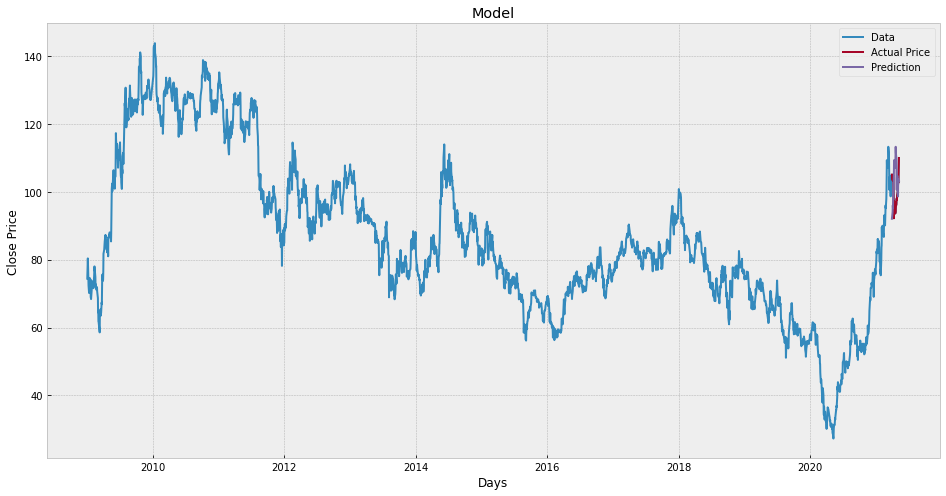

In [50]:
prediction = lr_prediction
valid = df[X.shape[0]:]
valid['Prediction'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Data','Actual Price','Prediction'])
plt.show()